In [17]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mode
from scipy.special import binom
from scipy.stats import iqr

In [18]:
# Replace 'your_excel_file.xlsx' with the actual path to your Excel file
excel_file_path = '05_Excel_Output_Sample/01_JSONOutput.xlsx'

# Reading the Excel file
df = pd.read_excel(excel_file_path)

df.head()

,File Name & Page,Word,X0,Y0,X1,Y1,X,Y,Coordinate
0,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,AIM,6,6,17,13,12,9,"(12, 9)"
1,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,Form,20,6,37,13,28,9,"(28, 9)"
2,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,1,39,6,43,13,41,9,"(41, 9)"
3,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,Rev.3,393,4,411,11,402,8,"(402, 8)"
4,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,Jun,413,4,424,11,419,8,"(419, 8)"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133491 entries, 0 to 133490
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   File Name & Page  133491 non-null  object
 1   Word              132362 non-null  object
 2   X0                133491 non-null  int64 
 3   Y0                133491 non-null  int64 
 4   X1                133491 non-null  int64 
 5   Y1                133491 non-null  int64 
 6   X                 133491 non-null  int64 
 7   Y                 133491 non-null  int64 
 8   Coordinate        133491 non-null  object
dtypes: int64(6), object(3)
memory usage: 9.2+ MB


In [20]:
df.describe()

,X0,Y0,X1,Y1,X,Y
count,133491.000000,133491.000000,133491.000000,133491.000000,133491.000000,133491.000000
mean,213.586392,346.831037,237.905072,355.041007,225.725952,350.941951
std,141.428064,257.131362,141.646413,257.048495,141.242851,257.085071
min,-14.000000,-17.000000,4.000000,0.000000,2.000000,-2.000000
25%,99.000000,87.000000,124.000000,94.000000,111.000000,90.000000
50%,187.000000,357.000000,214.000000,366.000000,198.000000,361.000000
75%,309.000000,563.000000,336.000000,571.000000,323.000000,567.000000
max,952.000000,1242.000000,957.000000,1248.000000,955.000000,1245.000000


In [21]:
df['Word'].unique()

array(['AIM', 'Form', '1', ..., '22.80', '22.66', '340.90'], dtype=object)

In [22]:
df['Word'].nunique()

8107

In [23]:
df['Word'].value_counts() #mode

Word
Inspection                        2718
REPORT                            2041
No.:                              1842
Photo                             1742
Item:                             1541
                                  ... 
32.94                                1
32.89                                1
32.78                                1
5-2017-08-U76-CUI-12-PL760022-       1
340.90                               1
Name: count, Length: 8107, dtype: int64

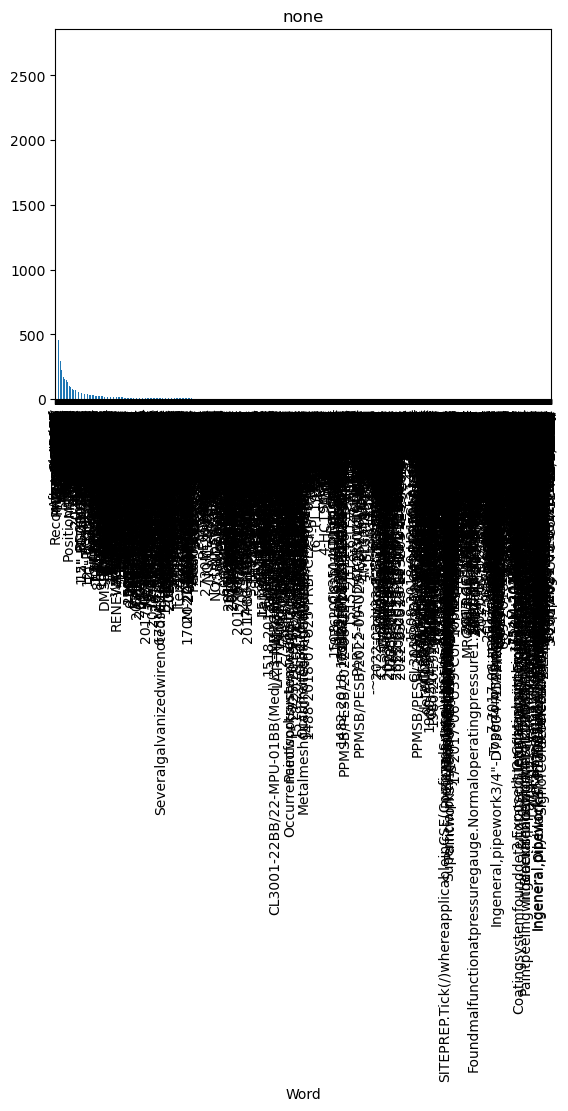

In [24]:
word_count = df['Word'].value_counts()

word_count.plot.bar(title = "none");

{'whiskers': [<matplotlib.lines.Line2D at 0x2609aa946d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2609aa94c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2609aa94400>],
 'medians': [<matplotlib.lines.Line2D at 0x2609aaa4250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2609aaa4520>],
 'means': []}

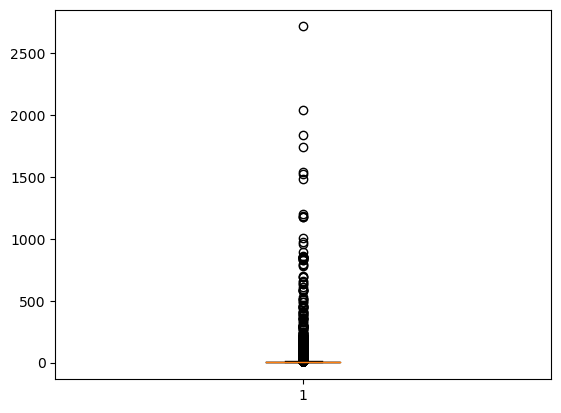

In [25]:
plt.boxplot(word_count)

In [26]:
grouped_word_counts = df.groupby('Word').size().reset_index(name='count')
print(grouped_word_counts)


         Word  count
0           0     79
1           !     16
2          !!      2
3        !!!!      1
4     !!!!!!!      1
...       ...    ...
8102       ⁰C      3
8103        ↔      1
8104        ↕      1
8105        √      4
8106        ≥      8

[8107 rows x 2 columns]


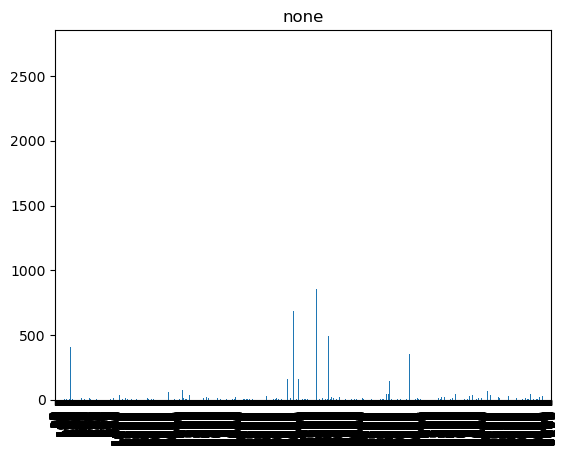

In [31]:

grouped_word_counts['count'].plot.bar(title = "none");

{'whiskers': [<matplotlib.lines.Line2D at 0x2609ae01d30>,
 'caps': [<matplotlib.lines.Line2D at 0x2609ae06310>,
 'boxes': [<matplotlib.lines.Line2D at 0x2609ae01ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x2609ae068b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2609ae06b80>],
 'means': []}

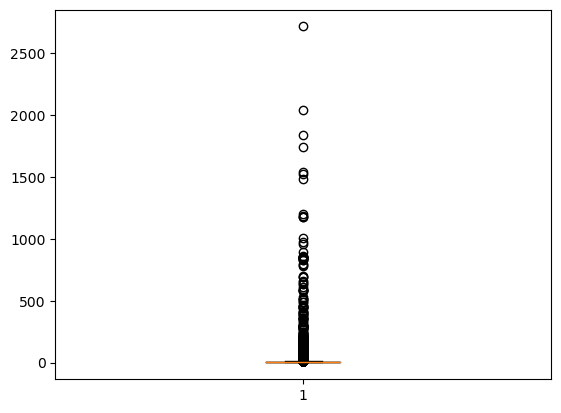

In [32]:
plt.boxplot(grouped_word_counts['count'])

Test2

In [33]:
# Combine columns 'A', 'B', and 'C' into a new column 'Combined'
df['Combined'] = df.apply(lambda row: f"{row['Word']} , {row['Coordinate']} ", axis=1)

In [34]:
df.head()

,File Name & Page,Word,X0,Y0,X1,Y1,X,Y,Coordinate,Combined
0,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,AIM,6,6,17,13,12,9,"(12, 9)","AIM , (12, 9)"
1,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,Form,20,6,37,13,28,9,"(28, 9)","Form , (28, 9)"
2,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,1,39,6,43,13,41,9,"(41, 9)","1 , (41, 9)"
3,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,Rev.3,393,4,411,11,402,8,"(402, 8)","Rev.3 , (402, 8)"
4,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,Jun,413,4,424,11,419,8,"(419, 8)","Jun , (419, 8)"


In [35]:
df['Combined'].unique()

array(['AIM , (12, 9) ', 'Form , (28, 9) ', '1 , (41, 9) ', ...,
       'End , (25, 351) ', 'of , (33, 351) ', 'Report , (44, 351) '],
      dtype=object)

In [36]:
df['Combined'].nunique()

45623

In [37]:
df['Combined'].value_counts() #mode

Combined
REPORT , (17, 47)              638
Photo , (65, 381)              626
TAG: , (187, 47)               618
Inspection , (238, 70)         618
After-Cleaning , (191, 70)     618
                              ... 
UNDERGROUND , (282, 148)         1
FIREWATER , (229, 148)           1
INSPECTION: , (182, 148)         1
VISUAL , (144, 148)              1
Report , (44, 351)               1
Name: count, Length: 45623, dtype: int64

In [38]:
df['Combined'].describe()

count                 133491
unique                 45623
top       REPORT , (17, 47) 
freq                     638
Name: Combined, dtype: object

In [39]:
grouped_combined_counts = df.groupby('Combined').size().reset_index(name='count')
print(grouped_combined_counts)

              Combined  count
0      ! , (113, 452)       1
1      ! , (127, 470)       1
2      ! , (184, 483)       1
3      ! , (280, 478)       1
4      ! , (295, 571)       1
...                ...    ...
45618  ↕ , (435, 610)       1
45619  √ , (421, 436)       2
45620  √ , (421, 450)       2
45621  ≥ , (105, 251)       4
45622  ≥ , (381, 651)       4

[45623 rows x 2 columns]


In [40]:
grouped_combined_counts['count'].describe()

count    45623.000000
mean         2.925958
std         17.808145
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        638.000000
Name: count, dtype: float64

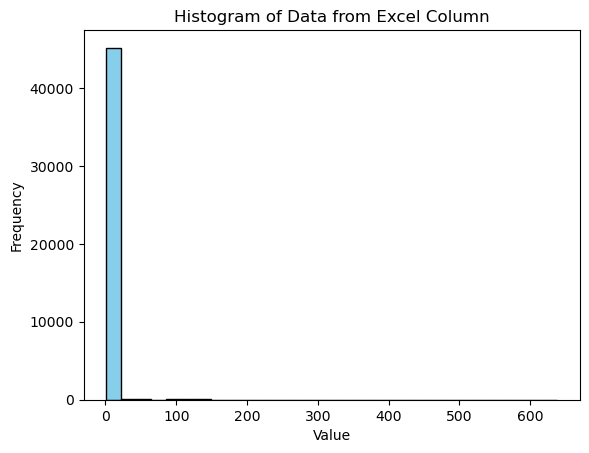

In [50]:
data = grouped_combined_counts['count']


plt.hist(data, bins=30, color='skyblue', edgecolor='black')


plt.title('Histogram of Data from Excel Column')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()

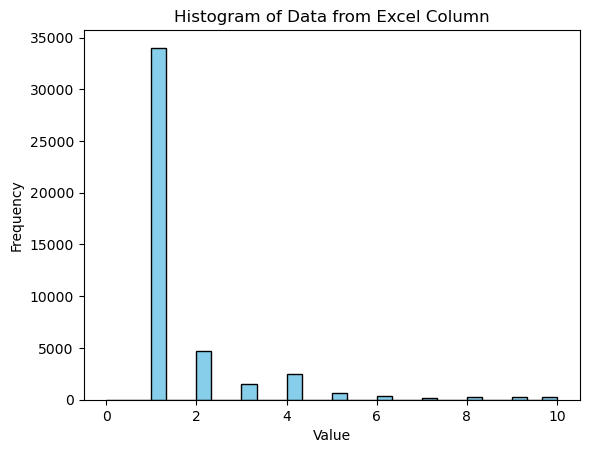

In [52]:
plt.hist(data, bins=30,range=(0, 10), color='skyblue', edgecolor='black')


plt.title('Histogram of Data from Excel Column')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()

Test 3

In [41]:
excel_file_path = '05_Excel_Output_Sample/03_JSONOutputcleaned.xlsx'

# Reading the Excel file
df2 = pd.read_excel(excel_file_path)

df2.head()

,File Name & Page,Word,X0,Y0,X1,Y1,X,Y,Coordinate,NameFactorized,WordFactorized,CoordinateFactorized,Combined,CombinedFactorized,count
0,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,AIM,6,6,17,13,12,9,"(12, 9)",0,0,0,"0 , (12, 9)",0,92
1,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,Form,20,6,37,13,28,9,"(28, 9)",0,1,1,"1 , (28, 9)",1,87
2,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,1,39,6,43,13,41,9,"(41, 9)",0,2,2,"2 , (41, 9)",2,87
3,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,Rev.3,393,4,411,11,402,8,"(402, 8)",0,3,3,"3 , (402, 8)",3,97
4,1482H-2018-11-22-PRBI-CL2121A-01-BB-VI 3_page1,Jun,413,4,424,11,419,8,"(419, 8)",0,4,4,"4 , (419, 8)",4,91


In [42]:
df2['Combined'].unique()

array(['0 , (12, 9) ', '1 , (28, 9) ', '2 , (41, 9) ', ...,
       '387 , (572, 771) ', '40 , (586, 771) ', '106 , (591, 771) '],
      dtype=object)

In [43]:
df2['Combined'].nunique()

11609

In [44]:
df2['Combined'].value_counts() #mode

Combined
155 , (17, 47)        638
121 , (65, 381)       626
10 , (238, 70)        618
165 , (191, 70)       618
159 , (187, 47)       618
                     ... 
3919 , (212, 121)       2
3918 , (185, 121)       2
3917 , (149, 121)       2
3915 , (252, 731)       2
106 , (591, 771)        2
Name: count, Length: 11609, dtype: int64

In [45]:
df2['Combined'].describe()

count               99477
unique              11609
top       155 , (17, 47) 
freq                  638
Name: Combined, dtype: object

In [46]:
grouped_combined_counts2 = df2.groupby('Combined').size().reset_index(name='count')
print(grouped_combined_counts2)

                Combined  count
0       -1 , (102, 400)       2
1       -1 , (110, 716)       2
2       -1 , (133, 418)       2
3       -1 , (143, 417)       2
4       -1 , (175, 494)       4
...                  ...    ...
11604    990 , (73, 51)       4
11605  992 , (127, 752)       3
11606  992 , (130, 752)       2
11607  992 , (245, 732)       3
11608  992 , (251, 400)       2

[11609 rows x 2 columns]


In [47]:
grouped_combined_counts2['count'].describe()

count    11609.000000
mean         8.568955
std         34.694029
min          2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        638.000000
Name: count, dtype: float64

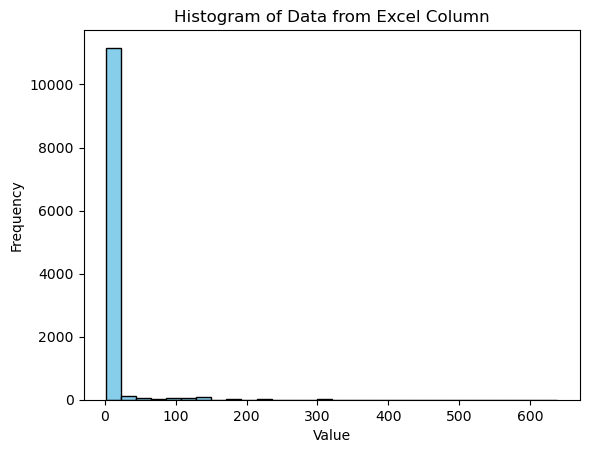

In [48]:
data = grouped_combined_counts2['count']


plt.hist(data, bins=30, color='skyblue', edgecolor='black')


plt.title('Histogram of Data from Excel Column')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()

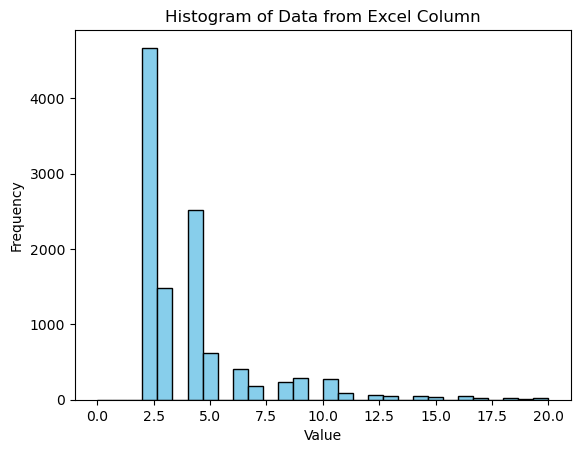

In [49]:
plt.hist(data, bins=30,range=(0, 20), color='skyblue', edgecolor='black')


plt.title('Histogram of Data from Excel Column')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()